# Single AI crypto concept

In [1]:
from xdata_config import *

## 1 - Imports and fonctions

In [2]:
from functions_module import *

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (
2023-02-16 15:33:33.667708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-16 15:33:33.667743: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-16 15:33:33.707830: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-16 15:33:34.533905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: N

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense 
from keras.models import load_model
from keras.layers import BatchNormalization, Dense

## Special list if needed

In [ ]:
Binance_USDT_HALAL.index("ROSE/USDT")

In [ ]:
from datetime import date
TICKERS = "../Binance-Fast-Trade-Bot/volatile_volume_" + str(date.today()) + ".txt"
VOLATILE_COINS=[line.strip() for line in open(TICKERS)]
PAIR_WITH="BUSD"
VOLATILE_USDT_PAIRS=[coin+"/USDT" for coin in VOLATILE_COINS]
VOLATILE_BUSD_PAIRS=[coin+"/BUSD" for coin in VOLATILE_COINS]
VOLATILE_BUSD_PAIRS


In [ ]:
coins_to_download=''
for coin in VOLATILE_COINS:
    coins_to_download=coins_to_download+" "+coin
f"node database/ddargs.js {coins_to_download} {PAIR_WITH}"

In [ ]:
coins_to_download=''
for coin in VOLATILE_COINS:
    coins_to_download=coins_to_download+" "+coin
os.system(f"node database/ddargs.js {coins_to_download} {PAIR_WITH}")#node database/ddargs.js ORN BUSD

In [ ]:
pair_list = VOLATILE_BUSD_PAIRS
#tf = '1m'
oldest_pair = "BTC/USDT"
if oldest_pair not in pair_list: pair_list.append(oldest_pair)
df_list1m = {}
df_list1d = {}
df_list1h = {}
df_list5m = {}
df_list15m = {}


for pair in pair_list:
    df = get_historical_from_db(ccxt.binance(), pair, '1m', path="./database/")
    df_list1m[pair] = df.loc[:]

for pair in pair_list:
    df = get_historical_from_db(ccxt.binance(), pair, '1d', path="./database/")
    df_list1d[pair] = df.loc[:]

for pair in pair_list:
    df = get_historical_from_db(ccxt.binance(), pair, '1h', path="./database/")
    df_list1h[pair] = df.loc[:]

for pair in pair_list:
    df = get_historical_from_db(ccxt.binance(), pair, '5m', path="./database/")
    df_list5m[pair] = df.loc[:]

for pair in pair_list:
    df = get_historical_from_db(
        ccxt.binance(), pair, '15m', path="./database/")
    df_list15m[pair] = df.loc[:]
del(df)
df_list = df_list1m
prerr("Data load 100% use df_list1d[\"BTC/USDT\"] for exemple to access")



## Checking the import

In [5]:
# chking import
MetaData

,0,Pair,launch_week_stamp,launch_day_stamp,launch_minute
0,SNMBUSD,SNM/BUSD,1661126400000,1661472000000,2022-08-26 08:00:00
1,BTCUSDT,BTC/USDT,1502668800000,1502928000000,2017-08-17 04:00:00
2,LUNAUSDT,LUNA/USDT,1597622400000,1597968000000,2020-08-21 10:00:00
3,ETHUSDT,ETH/USDT,1502668800000,1502928000000,2017-08-17 04:00:00
4,GMTUSDT,GMT/USDT,1646611200000,1646784000000,2022-03-09 12:00:00
...,...,...,...,...,...
107,FIDAUSDT,FIDA/USDT,1632700800000,1632960000000,2021-09-30 12:00:00
108,XNOUSDT,XNO/USDT,1642982400000,1643328000000,2022-01-28 08:00:00
109,BTGUSDT,BTG/USDT,1618185600000,1618531200000,2021-04-16 07:00:00
110,GHSTUSDT,GHST/USDT,1629072000000,1629417600000,2021-08-20 10:00:00


In [6]:
if BUY_MODE=="BUY_ONLY":
    buy_function=buy_up_only
elif BUY_MODE=="BUY_UP":
    buy_function=buy_up
elif  BUY_MODE=="BUY_DIP":
    buy_function=buy_min_up
elif  BUY_MODE=="AFTER_DEPTH":
    buy_function=buy_after_depth
elif  BUY_MODE=="BUY_UP_CLOSE":
    buy_function=buy_up_close
elif  BUY_MODE=="AFTER_DEPTH_CLOSE":
    buy_function=buy_after_depth_close
    

try:
    os.mkdir(DATA_DIR, mode = 0o777)
except Exception as e:
    print(e)
print(f"Results dir: {DATA_DIR}")



[Errno 17] File exists: '/UltimeTradingBot/Data/AFTER_DEPTH_CLOSE'
Results dir: /UltimeTradingBot/Data/AFTER_DEPTH_CLOSE


In [ ]:
xdf=pd.DataFrame()
count=0
row_numbers=50000
for pair in pair_list:
    if pair != "BTC/USDT":
        print("working on: "+pair ,end=" -->")
        try:
            df=mini_expand4(pair=pair,i=0,j=len(df_list1m[pair]),window=WINDOW_SIZE,metadata=MetaData,BUY_PCT=BUY_PCT,SELL_PCT=SELL_PCT,buy_function=buy_function)
            print("df original shape "+str(df.shape))
            print(f"df original shape buy mean : {df.buy.mean()*100}")
            df=df.reset_index()
            try:df.pop("num_index")
            except: pass
            try:df.pop("index")
            except: pass
            try:df.pop("date")
            except: pass
            df=data_shufler(df)            
            #df=data_chooser(df,weight=50,row_numbers=df.buy.sum()*2)
            df=data_chooser50(df,row_numbers=row_numbers)
            gc.collect()
            df=data_cleanup(df)
            df=df.dropna()
            print(pair+f" is processed -- {count}/{len(pair_list)}")
        except Exception as e:
            print(f"error while processing {pair} {count}/{len(pair_list)}")
            print(e)
        xdf=pd.concat([xdf,df],axis=0)
        count+=1
        del(df)
        gc.collect()
df=xdf
del xdf
gc.collect()


In [ ]:
df=df.reset_index().drop(columns="num_index")
gc.collect()
for i in range(1):
    df = df.reindex(np.random.permutation(df.index)).reset_index().drop(columns="index")
    gc.collect()
df

In [ ]:
df.to_feather(f"../Data/fea/w{WINDOW_SIZE}_buy{BUY_PCT}_forcasr{MAX_FORCAST_SIZE}min_{BUY_MODE}.fea")

In [ ]:
gc.collect()
print("df choosen data shape"+str(df.shape))
print(f"pair: {(df.shape[0]/2)==df.buy.sum()}")
dt=df.to_numpy(dtype=np.float32)
#dt=df.to_numpy()
dt=np.nan_to_num(dt,nan=0)
#dt=dt.astype(np.float32)
dt=np.nan_to_num(dt, neginf=0) 
dt=np.nan_to_num(dt, posinf=0) 

## normalisation
index_20pct= int(0.2*len(dt[:,0]))
print(index_20pct)
if True:
    if True:
    #if True:
        print("normalizing ...")
        mean = dt[index_20pct:, 0:-1].mean(axis=0)
        std = dt[index_20pct:, 0:-1].std(axis=0)



        dt[index_20pct:, 0:-1] -= mean 
        dt[index_20pct:, 0:-1] /= std

        dt[:index_20pct, :-1] -=mean
        dt[:index_20pct, :-1] /= std
        FIRST_NORM_FLAG=False
        ######################### SAVIN NORM ################
        try:
            Normalization={"mean":mean.tolist(),"std":std.tolist()}
            with open(Normalization_File, 'w+') as fp:
                        json.dump(Normalization, fp,  indent=4)
                        print(fp.name)
        except Exception as e:
            print("error Normalization in juppiter")
            print(e)
    else:print("already normalized")
    
    


In [ ]:
# feather loading
df=pd.read_feather(f"../Data/fea/w{WINDOW_SIZE}_buy{BUY_PCT}_forcasr{MAX_FORCAST_SIZE}min_{BUY_MODE}.fea")
dt=df.to_numpy(dtype=np.float32)
dt=fixdt(dt)
index_20pct= int(0.2*len(dt[:,0]))
gc.collect()



In [ ]:

## Model
IN_DIM=dt.shape[1]-1
model = Sequential()
model.add(Dense(int(250),input_dim=IN_DIM,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(int(20),activation='relu')) 
model.add(Dense(int(50),activation='relu')) 
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath =Model_FileName,monitor ='val_accuracy',save_best_only = True, save_weights = True)
callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=15,verbose=1)
print("saving file in: "+Model_FileName)
history = model.fit(dt[index_20pct:, 0:-1],
                dt[index_20pct:,-1],
                validation_data=(dt[:index_20pct, :-1],dt[:index_20pct,-1]),
                epochs=6000,
                batch_size=256*10,
                callbacks=[callbacks_a,callbacks_b])

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)


In [ ]:
model1=model
model1.compile()
#model1.save(Model_FileName+"_v1.h5")
print(Normalization_File)
print(Model_FileName+"_v1.h5")



## Self-Normalized Model

In [ ]:

## Normalzed Model
IN_DIM=dt.shape[1]-1
model = Sequential()
model.add(BatchNormalization(input_shape=(IN_DIM,)))
model.add(Dense(int(250),activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(int(20),activation='relu')) 
model.add(Dense(int(50),activation='relu')) 
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath =Model_FileName,monitor ='val_accuracy',save_best_only = True, save_weights = True)
callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=15,verbose=1)
print("saving file in: "+Model_FileName)
history = model.fit(dt[index_20pct:, 0:-1],
                dt[index_20pct:,-1],
                validation_data=(dt[:index_20pct, :-1],dt[:index_20pct,-1]),
                epochs=6000,
                batch_size=256*10,
                callbacks=[callbacks_a,callbacks_b])

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)


In [ ]:
model.save("/UltimeTradingBot/Data/BUY_UP_CLOSE/tp60_w6_max3min_Model_init_v1.h5")

## Direct Pandas Dataframe

In [ ]:

## Direct Pandas Dataframe to train the Model
index_20pct=int(df.shape[0]*0.2)
IN_DIM=df.shape[1]-1
model = Sequential()
model.add(BatchNormalization(input_shape=(IN_DIM,)))
model.add(Dense(int(250),activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(int(20),activation='relu')) 
model.add(Dense(int(50),activation='relu')) 
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath =Model_FileName,monitor ='val_accuracy',save_best_only = True, save_weights = True)
callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=15,verbose=1)
print("saving file in: "+Model_FileName)
history = model.fit(df.iloc[index_20pct:, 0:-1],
                df.iloc[index_20pct:,-1],
                validation_data=(df.iloc[:index_20pct, :-1],df.iloc[:index_20pct,-1]),
                epochs=6000,
                batch_size=256*10,
                callbacks=[callbacks_a,callbacks_b])

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)


## 2- Model Plus

In [ ]:

#model1=model
## Model 2

IN_DIM=dt.shape[1]-1
model = Sequential()
model.add(Dense(int(2500),input_dim=IN_DIM,activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(int(600),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(int(200),activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(int(100),activation='sigmoid')) 
model.add(Dropout(0.3))
model.add(Dense(int(600),activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(int(100),activation='sigmoid')) 

model.add(Dense(int(50),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath =Model_FileName,monitor ='val_accuracy',save_best_only = True, save_weights = True)
callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=8,verbose=1)
print("saving file in: "+Model_FileName)
history = model.fit(dt[index_20pct:, 0:-1],
                dt[index_20pct:,-1],
                validation_data=(dt[:index_20pct, :-1],dt[:index_20pct,-1]),
                epochs=500,
                batch_size=256*10,
                callbacks=[callbacks_a,callbacks_b])

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)
#1735/1735 [==============================] - 1829s 1s/step - loss: 0.6198 - accuracy: 0.6550 - val_loss: 0.6129 - val_accuracy: 0.6633


In [ ]:
#model1=model
## Model 2

IN_DIM=dt.shape[1]-1
model = Sequential()
model.add(Dense(int(250),input_dim=IN_DIM,activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(int(60),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(int(20),activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(int(10),activation='sigmoid')) 
model.add(Dropout(0.3))
model.add(Dense(int(60),activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(int(60),activation='sigmoid')) 

model.add(Dense(int(5),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath =Model_FileName,monitor ='val_accuracy',save_best_only = True, save_weights = True)
callbacks_b = EarlyStopping(monitor ='val_accuracy',mode='auto',patience=8,verbose=1)
print("saving file in: "+Model_FileName)
history = model.fit(dt[index_20pct:, 0:-1],
                dt[index_20pct:,-1],
                validation_data=(dt[:index_20pct, :-1],dt[:index_20pct,-1]),
                epochs=500,
                batch_size=256*50,
                callbacks=[callbacks_a,callbacks_b])

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)
#1735/1735 [==============================] - 95s 54ms/step - loss: 0.6314 - accuracy: 0.6439 - val_loss: 0.6263 - val_accuracy: 0.6563 batch_size=256*10
#8672/8672 [==============================] - 121s 14ms/step - loss: 0.6279 - accuracy: 0.6485 - val_loss: 0.6257 - val_accuracy: 0.6489  batch_size=256*2
#347/347 [==============================] - 77s 219ms/step - loss: 0.6540 - accuracy: 0.6301 - val_loss: 0.6353 - val_accuracy: 0.6522 batch_size=256*50


In [ ]:
# CHATGPT Optimization
class_weights = {0: 10., 1: 1.}

IN_DIM = dt.shape[1] - 1
model = Sequential()
model.add(Dense(int(2500), input_dim=IN_DIM, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(int(600), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(int(200), activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(int(100), activation='sigmoid'))
model.add(Dense(int(600), activation='elu'))
model.add(BatchNormalization())
model.add(Dense(int(50), activation='elu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks_a = ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True)
callbacks_b = EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1)
print("saving file in: " + Model_FileName)
history = model.fit(dt[index_20pct:, :-1],
                    dt[index_20pct:, -1],
                    validation_data=(dt[:index_20pct, :-1], dt[:index_20pct, -1]),
                    epochs=500,
                    batch_size=256 * 20,
                    callbacks=[callbacks_a, callbacks_b],
                    class_weight=class_weights)

print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)
#1735/1735 [==============================] - 2172s 1s/step - loss: 0.6249 - accuracy: 0.6511 - val_loss: 0.6145 - val_accuracy: 0.6602
big_model=model


In [ ]:
#ChatGPT2
from keras.layers import Dense, Dropout,BatchNormalization
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
gc.collect()
# Model Optimization
SizeTunner=0.5
IN_DIM = dt.shape[1] - 1
model = Sequential()
model.add(Dense(int(200*SizeTunner), input_dim=IN_DIM, activation='elu' , activity_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dense(int(80*SizeTunner), activation='elu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(int(40*SizeTunner), activation='elu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(int(20*SizeTunner), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(int(50*SizeTunner), activation='elu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(int(10*SizeTunner), activation='elu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callbacks_a = ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True)
callbacks_b = EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1)

print("saving file in: " + Model_FileName)
history = model.fit(dt[index_20pct:, :-1],
                    dt[index_20pct:, -1],
                    validation_data=(dt[:index_20pct, :-1], dt[:index_20pct, -1]),
                    epochs=500,
                    batch_size=256*20,
                    callbacks=[callbacks_a, callbacks_b])

In [ ]:
import gc
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Define the class weights
class_weights = {0: 1., 1: 1.}

gc.collect()

SizeTunner = 1
IN_DIM = dt.shape[1] - 1

model = Sequential()
model.add(Dense(int(200 * SizeTunner), input_dim=IN_DIM, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dense(int(80 * SizeTunner), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(int(20 * SizeTunner), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callbacks = [
    ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True),
    EarlyStopping(monitor='val_accuracy', mode='auto', patience=6, verbose=1)
]

print("saving file in: " + Model_FileName)
history = model.fit(dt[index_20pct:, :-1],
                    dt[index_20pct:, -1],
                    validation_data=(dt[:index_20pct, :-1], dt[:index_20pct, -1]),
                    epochs=500,
                    batch_size=256*50,
                    callbacks=callbacks,
                    class_weight=class_weights)

#868/868 [==============================] - 30s 35ms/step - loss: 0.6078 - accuracy: 0.6664 - val_loss: 0.6107 - val_accuracy: 0.6639 >0.6646
#Results after 380 min
# Epoch 133/500
# 347/347 [==============================] - 138s 398ms/step - loss: 0.5867 - accuracy: 0.6842 - val_loss: 0.5839 - val_accuracy: 0.6863
# Epoch 134/500
# 347/347 [==============================] - 137s 395ms/step - loss: 0.5865 - accuracy: 0.6843 - val_loss: 0.5845 - val_accuracy: 0.6861
# Epoch 134: early stopping



# Saving the model

In [ ]:
very_deep_model=load_model("/UltimeTradingBot/Data/BUY_UP_CLOSE/tp60_w6_max3min_Model_GoodVeryDeep.h5")

In [ ]:
model.save(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_VeryDeep.h5")

In [ ]:
#model=load_model(Model_FileName+"_v2.h5")
#model1=load_model(Model_FileName+"_v1.h5")
very_deep_model=load_model(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_VeryDeep.h5")

In [ ]:
mini_range_start=0
mini_range_stop=200000
model.evaluate(dt[mini_range_start:mini_range_stop,:-1],dt[mini_range_start:mini_range_stop,-1])

# Unsing CNN

In [ ]:
from keras.applications.vgg16 import VGG16

# Load the VGG16 model without the top layer (i.e., without the final classification layer)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IN_DIM,))

# Freeze all layers in the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Add the VGG16 model to the hidden layers of your network
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(int(200), activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(int(60), activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(int(30), activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(int(10), activation='sigmoid'))
model.add(Dense(int(30), activation='elu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
callbacks_a = ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True)
callbacks_b = EarlyStopping(monitor='val_accuracy', mode='auto', patience=8, verbose=1)
history = model.fit(dt[index_20pct:, 0:-1],
                dt[index_20pct:, -1],
                validation_data=(dt[:index_20pct, :-1], dt[:index_20pct, -1]),
                epochs=500,
                batch_size=256 * 10,
                callbacks=[callbacks_a, callbacks_b])

# Print results
print('##########################################################################')
print(f"------val_accuracy-----> {'{0:.4g}'.format(max(history.history['val_accuracy'])*100)} | {'{0:.4g}'.format(max(history.history['accuracy'])*100)} <----------accuracy----------")
print(Normalization_File)
print(Model_FileName)


## 3-  Test

### stats plus

In [ ]:
#USED_MODEL=very_deep_model
#model_init=model
USED_MODEL=load_model("/UltimeTradingBot/Data/BUY_UP_CLOSE/tp60_w6_max3min_Model_GoodVeryDeep.h5")
Prediction_Note=USED_MODEL.predict( dt[:, 0:-1])
prediction2=Prediction_Note.round()

In [ ]:
hp(prediction2[:,0].mean())

In [ ]:
PesemisticPrediction=(Prediction_Note[:,0]-0.2).round()

In [ ]:
hp(PesemisticPrediction.mean())

In [ ]:
Y=dt[:,-1].copy()
Y

In [ ]:
Pred01=prediction2[:,-1]
Pred01

In [ ]:
Original_Traget_Data=Y
Predicted_Data=Pred01

TruePred=((Original_Traget_Data==Predicted_Data)).copy()
ModelAccuracy=hp(TruePred.mean(),"ModelAccuracy")

TrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
TrueWinPred_Mean=hp(TrueWinPred.mean(),"True Win Predictions Mean of all")

LossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
LossPred_Mean=hp(LossPred.mean(),"XXX Loss Buy Mean of all")

MissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
MissedDeal_Mean=hp(MissedDealPred.mean(),"Missed good deal off all")

GoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
GoodZero_Mean=hp(GoodZeroPred.mean(),"Good Zero prediction Mean")

fiability=TrueWinPred_Mean + LossPred_Mean + MissedDeal_Mean + GoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")

## Retrain

In [ ]:
good_dt=dt[TruePred]
good_dt

In [ ]:
good_dt.shape

In [ ]:
bad_dt=dt[ np.logical_not(TruePred)]
bad_dt

In [ ]:
bad_dt.shape

In [ ]:
#bad prediction re
## XXXXX ##
bad_dt=good_dt
## XXXXXX ##

import gc
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Define the class weights
index_20pct=int(bad_dt.shape[1]*0.2)

class_weights = {0: 1., 1: 1.}

gc.collect()

SizeTunner = 1
IN_DIM = bad_dt.shape[1] - 1

model = Sequential()
model.add(BatchNormalization(input_shape=(IN_DIM,)))
model.add(Dense(int(200 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(Dense(int(80 * SizeTunner), activation='relu'))
model.add(Dense(int(20 * SizeTunner), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callbacks = [
    ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True),
    EarlyStopping(monitor='val_accuracy', mode='auto', patience=6, verbose=1)
]

print("saving file in: " + Model_FileName)
history = model.fit(bad_dt[index_20pct:, :-1],
                    bad_dt[index_20pct:, -1],
                    validation_data=(bad_dt[:index_20pct, :-1], bad_dt[:index_20pct, -1]),
                    epochs=500,
                    batch_size=256*10,
                    callbacks=callbacks,
                    class_weight=class_weights)

#868/868 [==============================] - 30s 35ms/step - loss: 0.6078 - accuracy: 0.6664 - val_loss: 0.6107 - val_accuracy: 0.6639 >0.6646
#Results after 380 min
# Epoch 133/500
# 347/347 [==============================] - 138s 398ms/step - loss: 0.5867 - accuracy: 0.6842 - val_loss: 0.5839 - val_accuracy: 0.6863
# Epoch 134/500
# 347/347 [==============================] - 137s 395ms/step - loss: 0.5865 - accuracy: 0.6843 - val_loss: 0.5845 - val_accuracy: 0.6861
# Epoch 134: early stopping



In [ ]:
very_deep_bad_model=model
very_deep_bad_model.save(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_BadVeryDeep_v2.h5")

In [ ]:
USED_MODEL=very_deep_bad_model
bad_Prediction_Note=USED_MODEL.predict( dt[:, 0:-1])
Pred02=bad_Prediction_Note.round()
Original_Traget_Data=Y
Predicted_Data=Pred02[:,0]

BadTruePred=(Original_Traget_Data==Predicted_Data).copy()
BadModelAccuracy=hp(BadTruePred.mean(),"ModelAccuracy")

BadTrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
BadTrueWinPred_Mean=hp(BadTrueWinPred.mean(),"True Win Predictions Mean of all")

BadLossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
BadLossPred_Mean=hp(BadLossPred.mean(),"XXX Loss Buy Mean of all")

BadMissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
BadMissedDeal_Mean=hp(BadMissedDealPred.mean(),"Missed good deal off all")

BadGoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
BadGoodZero_Mean=hp(BadGoodZeroPred.mean(),"Good Zero prediction Mean")

fiability=BadTrueWinPred_Mean + BadLossPred_Mean + BadMissedDeal_Mean + BadGoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")

### 3x Retrained

In [ ]:
FORCED_Y=((Predicted_Data==Y)&(Y==1))

#bad prediction re
import gc
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Define the class weights
index_20pct=int(dt.shape[1]*0.2)

class_weights = {0: 1., 1: 1.}

gc.collect()

SizeTunner = 1
IN_DIM = dt.shape[1] - 1

model = Sequential()
model.add(BatchNormalization(input_shape=(IN_DIM,)))
model.add(Dense(int(200 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(Dense(int(80 * SizeTunner), activation='relu'))
model.add(Dense(int(20 * SizeTunner), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callbacks = [
    ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True),
    EarlyStopping(monitor='val_accuracy', mode='auto', patience=6, verbose=1)
]

print("saving file in: " + Model_FileName)
history = model.fit(dt[index_20pct:, :-1],
                    FORCED_Y[index_20pct:],
                    validation_data=(dt[:index_20pct, :-1], FORCED_Y[:index_20pct]),
                    epochs=500,
                    batch_size=256*20,
                    callbacks=callbacks,
                    class_weight=class_weights)

#868/868 [==============================] - 30s 35ms/step - loss: 0.6078 - accuracy: 0.6664 - val_loss: 0.6107 - val_accuracy: 0.6639 >0.6646
#Results after 380 min
# Epoch 133/500
# 347/347 [==============================] - 138s 398ms/step - loss: 0.5867 - accuracy: 0.6842 - val_loss: 0.5839 - val_accuracy: 0.6863
# Epoch 134/500
# 347/347 [==============================] - 137s 395ms/step - loss: 0.5865 - accuracy: 0.6843 - val_loss: 0.5845 - val_accuracy: 0.6861
# Epoch 134: early stopping



In [ ]:
model_good_x3=model

### Good Retrain

In [ ]:
#bad prediction re
import gc
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Define the class weights
index_20pct=int(good_dt.shape[1]*0.2)

class_weights = {0: 1., 1: 1.}

gc.collect()

SizeTunner = 1
IN_DIM = good_dt.shape[1] - 1

model = Sequential()
model.add(BatchNormalization(input_shape=(IN_DIM,)))
model.add(Dense(int(200 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(BatchNormalization())
model.add(Dense(int(80 * SizeTunner), activation='elu'))
model.add(Dense(int(80 * SizeTunner), activation='relu'))
model.add(Dense(int(20 * SizeTunner), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callbacks = [
    ModelCheckpoint(filepath=Model_FileName, monitor='val_accuracy', save_best_only=True, save_weights=True),
    EarlyStopping(monitor='val_accuracy', mode='auto', patience=6, verbose=1)
]

print("saving file in: " + Model_FileName)
history = model.fit(good_dt[index_20pct:, :-1],
                    good_dt[index_20pct:, -1],
                    validation_data=(good_dt[:index_20pct, :-1], good_dt[:index_20pct, -1]),
                    epochs=500,
                    batch_size=256*50,
                    callbacks=callbacks,
                    class_weight=class_weights)

#868/868 [==============================] - 30s 35ms/step - loss: 0.6078 - accuracy: 0.6664 - val_loss: 0.6107 - val_accuracy: 0.6639 >0.6646
#Results after 380 min
# Epoch 133/500
# 347/347 [==============================] - 138s 398ms/step - loss: 0.5867 - accuracy: 0.6842 - val_loss: 0.5839 - val_accuracy: 0.6863
# Epoch 134/500
# 347/347 [==============================] - 137s 395ms/step - loss: 0.5865 - accuracy: 0.6843 - val_loss: 0.5845 - val_accuracy: 0.6861
# Epoch 134: early stopping



In [ ]:
Good_model=model


In [ ]:
very_deep_good_model=Good_model
very_deep_good_model.save(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_GoodVeryDeep.h5")

In [ ]:
print(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_GoodVeryDeep.h5")

In [ ]:
USED_MODEL=model_good_x3
Good_Prediction_Note=USED_MODEL.predict( dt[:, 0:-1])
Pred02=Good_Prediction_Note.round()
Original_Traget_Data=Y
Predicted_Data=Pred02[:,0]

GoodTruePred=((Original_Traget_Data==Predicted_Data)).copy()
GoodModelAccuracy=hp(GoodTruePred.mean(),"ModelAccuracy")

GoodTrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
GoodTrueWinPred_Mean=hp(GoodTrueWinPred.mean(),"True Win Predictions Mean of all")

GoodLossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
GoodLossPred_Mean=hp(GoodLossPred.mean(),"XXX Loss Buy Mean of all")

GoodMissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
GoodMissedDeal_Mean=hp(GoodMissedDealPred.mean(),"Missed good deal off all")

GoodGoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
GoodGoodZero_Mean=hp(GoodGoodZeroPred.mean(),"Good Zero prediction Mean")

fiability=GoodTrueWinPred_Mean + GoodLossPred_Mean + GoodMissedDeal_Mean + GoodGoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")
winratio=GoodTrueWinPred_Mean/(GoodTrueWinPred_Mean+GoodLossPred_Mean)
print(f"========= Win Ratio:{winratio*100} ====================")


In [ ]:
# USED_MODEL=very_deep_good_model
# #Good_Prediction_Note=very_deep_good_model.predict( dt[:, 0:-1])
# Bad_Prediction_Note=very_deep_good_model.predict( dt[:, 0:-1])
# Initial_Pred_Note=model_init.predict( dt[:, 0:-1])
# goodp=Good_Prediction_Note.round()
# badp=Bad_Prediction_Note.round()
# initp=Initial_Pred_Note.round()

Original_Traget_Data=Y
Predicted_Data=((goodp==badp)&(initp==goodp))[:,0]

GoodTruePred=(Original_Traget_Data==Predicted_Data).copy()
GoodModelAccuracy=hp(GoodTruePred.mean(),"ModelAccuracy")

GoodTrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
GoodTrueWinPred_Mean=hp(GoodTrueWinPred.mean(),"True Win Predictions Mean of all")

GoodLossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
GoodLossPred_Mean=hp(GoodLossPred.mean(),"XXX Loss Buy Mean of all")

GoodMissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
GoodMissedDeal_Mean=hp(GoodMissedDealPred.mean(),"Missed good deal off all")

GoodGoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
GoodGoodZero_Mean=hp(GoodGoodZeroPred.mean(),"Good Zero prediction Mean")

fiability=GoodTrueWinPred_Mean + GoodLossPred_Mean + GoodMissedDeal_Mean + GoodGoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")

In [ ]:
Original_Traget_Data==Predicted_Data

In [ ]:
Predicted_Data

In [5]:
#model_good_x3.save(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_model_good_x3.h5")
model_good_x3=load_model(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_model_good_x3.h5")
very_deep_good_model= load_model(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_GoodVeryDeep.h5")
print(f'{DATA_DIR}/tp{int(BUY_PCT*100)}_w{WINDOW_SIZE}_max{MAX_FORCAST_SIZE}min_Model'+"_model_good_x3.h5")

2023-02-16 13:03:15.437177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-16 13:03:15.437218: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-16 13:03:15.437247: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: abj-K93SV
2023-02-16 13:03:15.437258: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: abj-K93SV
2023-02-16 13:03:15.437319: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-02-16 13:03:15.437365: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 390.154.0


/UltimeTradingBot/Data/BUY_UP_CLOSE/tp60_w6_max3min_Model_model_good_x3.h5


### Test On special coin

In [104]:
def buy_after_depth_close(df,BUY_PCT=BUY_PCT,SELL_PCT=SELL_PCT,window=3):
    try:
        print (f"---buy_after_depth--- Buy pct: {BUY_PCT}%")
        mino=BUY_PCT*0.01
        maxo=-SELL_PCT*0.01
        codep1='df["buy"]=((('
        for i in range(1,window):
            codep1=codep1+'df["close"].shift(periods='+str(-i)+', freq=None, axis=0, fill_value=None)-df["close"])/df["close"] >=mino )| (('
        codep2='df["close"].shift(periods='+str(-window)+', freq=None, axis=0, fill_value=None)-df["close"])/df["close"] >=mino)).replace({False: 0, True: 1})'
        code=codep1+codep2
        prerr(code)
        exec(code)

        df['ismin'] = np.where(
        df['close'].shift(1) <= df.shift(-window-1).rolling(2*window)['close'].min(), 1,
       0
        )
        df["buy"]=((df['buy']==1 ) & (df['ismin']==1)).replace({False: 0, True: 1})
        
        codep1='df["sell"]=((( '
        for i in range(1,window):
            codep1=codep1+'df["low"].shift(periods='+str(-i)+', freq=None, axis=0, fill_value=None)-df["close"])/df["close"] <=maxo ) | (('
        codep2='df["low"].shift(periods='+str(-window)+', freq=None, axis=0, fill_value=None)-df["close"])/df["close"] <=maxo )).replace({False: 0, True: 1})'
        code=codep1+codep2
        prerr(code)
        exec(code)

        df["buy"]=((df['buy']==1 ) & (df['sell']==0)).replace({False: 0, True: 1})

    except Exception as e:
        print("Error buy only")
        print(e)
    try:df.pop("b")
    except:print("---buy_after_depth--- no b")
    try:df.pop("ismin")
    except:print("---buy_after_depth--- no sell")
    try:df.pop("sell")
    except:print("---buy_after_depth--- no sell")
    return df

In [112]:
## Generate Data
BAD_PERIOD_START="2022-08-30"
BAD_PERIOD_END="2022-11-22"
pair_to_test="GMT/USDT"
MAX_FORCAST_SIZE=6

loc_start=0
loc_end=1000000


# loc_start=df_list1m[pair_to_test].index.get_loc(pd.to_datetime(BAD_PERIOD_START))
# loc_end=df_list1m[pair_to_test].index.get_loc(pd.to_datetime(BAD_PERIOD_END))


OnePair_DF=mini_expand4(        pair=pair_to_test,
                                i=loc_start,j=loc_end,
                                window=WINDOW_SIZE,
                                metadata=MetaData,
                                high_weight=1,
                                BUY_PCT=0.4,
                                SELL_PCT=SELL_PCT,
                                buy_function=buy_after_depth_close
                        )
OnePair_DT=OnePair_DF.to_numpy()
gc.collect()
OnePair_DT=fixdt(OnePair_DT)
print(OnePair_DT[0,0] == OnePair_DF.iloc[0,0])
print(OnePair_DT[5,5] == OnePair_DF.iloc[5,5])
hp(OnePair_DF.buy.mean(),"Buy mean pct")


mini_expand : GMT/USDT
---buy_after_depth--- Buy pct: 0.4%
---buy_after_depth--- no b
False
False
Buy mean pct: 4.062%


4.062

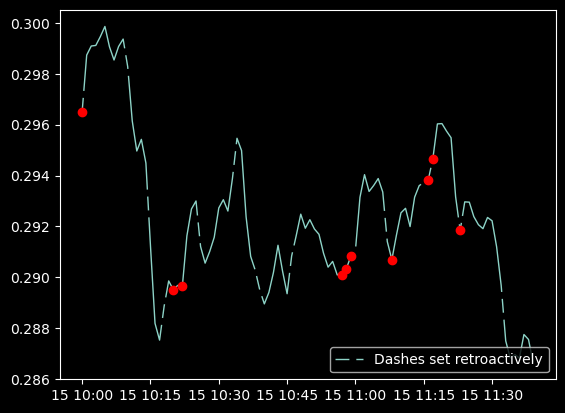

In [113]:
import matplotlib.pyplot as plt

i_start=600
i_end=i_start+100
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(OnePair_DF.index[i_start:i_end], OnePair_DF.price[i_start:i_end], '-', linewidth=1,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)
plt.plot(OnePair_DF[i_start:i_end][OnePair_DF.buy[i_start:i_end]==1].index, OnePair_DF[i_start:i_end][OnePair_DF.buy[i_start:i_end]==1].price, 'ro')


ax.legend(loc='lower right')
plt.show()

In [114]:

USED_MODEL=model_good_x3 #model_good_x3 #very_deep_good_model
OnePair_PredNote=USED_MODEL.predict( OnePair_DT[:, 0:-1])
OnePair_Pred=OnePair_PredNote.round()

gc.collect()

Original_Traget_Data=OnePair_DT[:,-1]
Predicted_Data=OnePair_Pred[:,0]
gc.collect()
TruePred=(Original_Traget_Data==Predicted_Data).copy()
ModelAccuracy=hp(TruePred.mean(),"ModelAccuracy")
gc.collect()
TrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
TrueWinPred_Mean=hp(TrueWinPred.mean(),"True Win Predictions Mean of all")
gc.collect()
LossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
LossPred_Mean=hp(LossPred.mean(),"XXX Loss Buy Mean of all")
gc.collect()

MissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
MissedDeal_Mean=hp(MissedDealPred.mean(),"Missed good deal off all")
gc.collect()

GoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
GoodZero_Mean=hp(GoodZeroPred.mean(),"Good Zero prediction Mean")
gc.collect()

fiability=TrueWinPred_Mean + LossPred_Mean + MissedDeal_Mean + GoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")
winratio=TrueWinPred_Mean/(LossPred_Mean+TrueWinPred_Mean)

print(f"========= Win Ratio:{winratio*100} ====================")

11252/11252 [==============================] - 31s 3ms/step
ModelAccuracy: 74.943%
True Win Predictions Mean of all: 2.283%
XXX Loss Buy Mean of all: 23.278%
Missed good deal off all: 1.779%
Good Zero prediction Mean: 72.660%
good fiability
========= Win Ratio:8.931575446969992 ====================


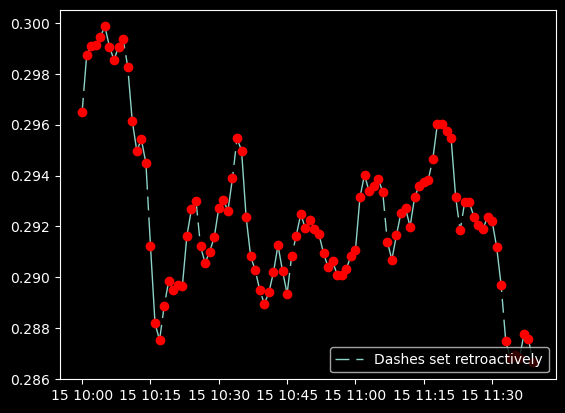

In [117]:
import matplotlib.pyplot as plt

PREDICTION_TO_TEST=Predicted_Data
i_start=600
i_end=i_start+100
x = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

fig, ax = plt.subplots()
line1, = ax.plot(OnePair_DF.index[i_start:i_end], OnePair_DF.price[i_start:i_end], '-', linewidth=1,
                 label='Dashes set retroactively')
line1.set_dashes(dashes)
plt.plot(OnePair_DF[i_start:i_end][PREDICTION_TO_TEST[i_start:i_end]==1].index, OnePair_DF[i_start:i_end][PREDICTION_TO_TEST[i_start:i_end]==1].price, 'ro')


ax.legend(loc='lower right')
plt.show()


In [ ]:
XX=OnePair_DT[:100000,:-1]
YY=OnePair_DT[:100000,-1]
precision=0.0
# Good_Prediction_Note=very_deep_good_model.predict( XX)
# Bad_Prediction_Note=very_deep_bad_model.predict( XX)
# Initial_Pred_Note=model_init.predict( XX)
Predicted_Data=OnePair_Pred[:300000,0]
goodp=(Good_Prediction_Note-precision).round()
# badp=(Bad_Prediction_Note).round()
# initp=Initial_Pred_Note.round()

# Original_Traget_Data=YY

#Predicted_Data=((goodp==badp|initp==goodp))[:,0]
Predicted_Data=(goodp)[:,0]

GoodTruePred=(Original_Traget_Data==Predicted_Data).copy()
GoodModelAccuracy=hp(GoodTruePred.mean(),"ModelAccuracy")

GoodTrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
GoodTrueWinPred_Mean=hp(GoodTrueWinPred.mean(),"True Win Predictions Mean of all")

GoodLossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
GoodLossPred_Mean=hp(GoodLossPred.mean(),"XXX Loss Buy Mean of all")

GoodMissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
GoodMissedDeal_Mean=hp(GoodMissedDealPred.mean(),"Missed good deal off all")

GoodGoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
GoodGoodZero_Mean=hp(GoodGoodZeroPred.mean(),"Good Zero prediction Mean")

winratio=GoodTrueWinPred_Mean/(GoodTrueWinPred_Mean+GoodLossPred_Mean)
fiability=GoodTrueWinPred_Mean + GoodLossPred_Mean + GoodMissedDeal_Mean + GoodGoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")
print(f"========= Win Ratio:{winratio*100} ====================")


In [ ]:
def test_prediction(XX,YY,USEDMODEL)
XX=OnePair_DT[:100000,:-1]
YY=OnePair_DT[:100000,-1]

# Good_Prediction_Note=very_deep_good_model.predict( XX)
# Bad_Prediction_Note=very_deep_bad_model.predict( XX)
# Initial_Pred_Note=model_init.predict( XX)
goodp=(Good_Prediction_Note-precision).round()
# badp=(Bad_Prediction_Note).round()
# initp=Initial_Pred_Note.round()

# Original_Traget_Data=YY

#Predicted_Data=((goodp==badp|initp==goodp))[:,0]
Predicted_Data=(goodp)[:,0]

GoodTruePred=(Original_Traget_Data==Predicted_Data).copy()
GoodModelAccuracy=hp(GoodTruePred.mean(),"ModelAccuracy")

GoodTrueWinPred=((Predicted_Data==1) & (Original_Traget_Data==1) ).copy()
GoodTrueWinPred_Mean=hp(GoodTrueWinPred.mean(),"True Win Predictions Mean of all")

GoodLossPred=((Predicted_Data==1) & (Original_Traget_Data==0) ).copy()
GoodLossPred_Mean=hp(GoodLossPred.mean(),"XXX Loss Buy Mean of all")

GoodMissedDealPred=((Predicted_Data==0) & (Original_Traget_Data==1) ).copy()
GoodMissedDeal_Mean=hp(GoodMissedDealPred.mean(),"Missed good deal off all")

GoodGoodZeroPred=((Predicted_Data==0) & (Original_Traget_Data==0) ).copy()
GoodGoodZero_Mean=hp(GoodGoodZeroPred.mean(),"Good Zero prediction Mean")

winratio=GoodTrueWinPred_Mean/(GoodTrueWinPred_Mean+GoodLossPred_Mean)
fiability=GoodTrueWinPred_Mean + GoodLossPred_Mean + GoodMissedDeal_Mean + GoodGoodZero_Mean
if( fiability == 100):print("good fiability")
else: print(f"check the fiability {fiability}")
print(f"========= Win Ratio:{winratio*100} ====================")
